# Rogi's Emotions Classification Model
## Convolutional Neural Network with Transfer Learning and Fine-Tuning

#### Notebook by [Doug Andrade](https://www.linkedin.com/in/douglasrandrade/), June 2024

2025-03-04 21:12:58.689678: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741140778.704952    3773 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741140778.709196    3773 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 21:12:58.723672: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

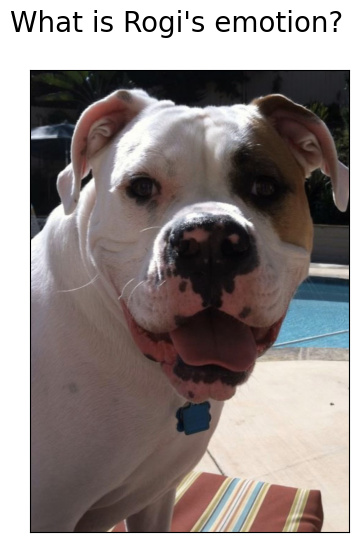

In [1]:
from PIL import Image
import numpy as np
from skimage import transform
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (128, 128, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

# Set new plot subclasses to iterate over random predictions
fig, ax = plt.subplots(figsize = (10, 6))
fig.suptitle('What is Rogi\'s emotion?', size = 20)
ax.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_7415.jpg'))
plt.savefig('is_rogi_happy.jpg')
plt.tight_layout

## Project Overview

### Motivation

The motivation of this project is to explore the application of Convolutional Neural Network (CNN) modeling with `Keras` and `TensorFlow` using a single NVIDIA graphics processing unit (GPU). After the passing of my wife's American Bulldog, Rogi, my wife inspired me to leverage this project to classify images of Rogi's life with particular interest in efficiently sorting out his happiest moments.

### Image Dataset

The project intended to begin with the simple but manually intensive approach of building a personally designed `Tensorflow` CNN model trained on $100$ manually labeled images of Rogi. However, I came across a labeled dataset on Kaggle titled [Dog Emotions Prediction](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction), which came with $15$,$921$ images stored within four labeled sub-directories *angry*, *happy*, *relaxed*, and *sad* ([Devzohaib, 2022](#ref4)).

##### Data Set Exploration and Preparation

On initial image visualization and data exploration, it became apparent that the images of dog emotions images were inconsistently labeled, likely due to varied and biased opinions of what an *angry*, *happy*, *relaxed*, and *sad* dog looks like. There were $6,596$ images of animals other than dogs, such as cartoons, lions, cats, monkeys, cows, horses, rabbits, etc. Consequently, I elected to manually relabel images based on a pre-defined set of consistent and objective emotional features, with an additional fifth class *"alert"*. To easily associate directory-labeled titles with one-hot encoding, I adjusted the label names to have exactly five characters each, for a final dataset of $9,325$ images:

  - Alert. The appearance of vigilance and attention toward something (wide eyes, stiff ears, rigid body).
  - Angry. The appearance of growling, with an aggressive display of teeth.
  - Frown. The appearance of dejection, pain, or abuse.
  - Happy. The display of the tongue, with a near human-like appearance of a smile.
  - Relax. Laying down or having the appearance of resting or doing nothing.
        
$6,596$ images were removed for three reasons:

  - Images other than a real dog.
  - The dog's face was not visible (i.e., facing away from the camera).
  - It did not reasonably fall within one of the five classes (too unique, distorted, an outlier type emotion, etc.). 

The image relabeling effort was an extremely slow and time-consuming process that took over three months; however, it underlined the criticality of data quality and maintenance to design a useful classification model. This dataset is available on Kaggle - [Dog Emotions - 5 Classes](https://doi.org/10.34740/KAGGLE/DSV/8330954).

The dataset was split into $80\%$ training and $20\%$ validation, and randomly shuffled to maximize each dataset’s combination of classes. The images were instantiated as three channeled red, green, and blue (RGB) color files of $128$ pixels size ($128x128x3$).

### Model Development

I used transfer learning and model fine-tuning to maximize my computer resources for optimal modeling performance. To establish a baseline model standard and to validate my model development approach, I built and tested a basic CNN model inspired by the `VGGNet`, as described in *Deep Learning Illustrated* by Jon Krohn ([Krohn, 2020, p.178](#ref8)).

For the transfer learning CNN model, I selected the `EfficientNetV2S` model for its heuristic development as a small model ($6.8$ times smaller than other models trained on the ImageNet dataset) with improved training speed and parameter efficiency ([Tan, 2021](#ref10)). I iterated over various combinations of fully connected dense layers added on top of `EfficientNetV2S`, while constraining the model training with categorical cross-entropy minimization, learning rate reduction, and early stopping callback features ([TensorFlow EfficientNetV2S API](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S)).

Fine-tuning development was centered around finding the optimal `EfficientNetV2S` layer to be unfrozen once the transfer learning training phase was completed ([Chollet, 2024](#ref3); [Krohn, 2020, p.188](#ref8)).

### Model Evaluation

A combination of metrics plotting (training and validation accuracy, categorical cross-entropy, and F1 Score), confusion matrix visualization (for specific class F1 scoring), as well as a metrics record table, were used to evaluate model performance ([Chollet, 2021, chap.8](#ref2); [Krohn, 2020, chap.10](#ref8)).

### Practical Evaluation

The final assessment, after a satisfactory model evaluation, was to observe the final model on unseen images of Rogi and allow my wife to evaluate how the model classified images of Rogi.

## Project Outline<a id='outline'></a>

1. [Problem Statement and Objectives](#step1)
2. [Modeling Metrics](#step2)
3. [Load Required Modules](#step3)
4. [Set-Up the Python Environment](#step4)
5. [Load and Preview the Data](#step5)
6. [CNN Transfer Learning Model Design](#step6)
    1. [Baseline Model Design and Training](#step6.a)
    2. [CNN Model Parameters](#step6.b)
    3. [CNN Callback Features](#step6.c)
    4. [CNN Transfer Learning Model set-up](#step6.d)
    5. [Train the CNN Transfer Learning Model](#step6.e)
    6. [CNN Transfer Learning Model Performance Analysis](#step6.f)
7. [CNN Fine-Tuning Model Design](#step7)
    1. [CNN Fine-Tuning Model Set-Up](#step7.a)
    2. [Train and Fine-Tune the CNN Transfer Model](#step7.b)
    3. [Fine-Tuned Model Performance Analysis](#step7.c)
    4. [Display Predicted Emotions from Validation Set](#step7.d)
8. [Final CNN Model Confusion Matrix](#step8)
9. [Final CNN Model Evaluation on Unseen Images of Rogi](#step9)
10. [Project Summary and Metrics History Review](#step10)

[References](#ref)

## Problem Statement<a id='step1'></a>

Create a CNN model that appropriately labels the emotion (*alert*, *angry*, *frown*, *happy*, *frown*) of $202$ unseen images of my wife's late American Bulldog, Rogi. 

#### Data Preparation, Model Design, and Training Plan:

1. Manually clean and re-label Kaggle's [Dog Emotions Prediction](https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction) dataset into five classes (*alert*, *angry*, *frown*, *happy*, *frown*), and randomly split into $80\%$ train and $20\%$ validation images. The cleaned, five-class image dataset can be downloaded from [Kaggle: Dog Emotions - 5 Classes](https://www.kaggle.com/datasets/dougandrade/dog-emotions-5-classes).
2. Establish basic initial image size and modeling parameters to test a simple model's functionality and performance.
    - I started with common and standard parameters:
        - $128$ image pixel size in RGB (three channels) format ($128$x$128$x$3$)
        - $128$ image batch size.
        - $100$ epoch limit.
        - `ReLU` activation layer.
        - `softmax` output layer.
3. Build a baseline CNN model.
    - A baseline model inspired by `VGGNet16` was designed - the highly popularized model from the 2014 ImageNet Large Scale Visual Recognition Challenge, which introduced efficient small kernel sizes for deep CNN layers ([Krohn, 2020, p. 178](#ref8)).
    - The purpose of the baseline model was to gain an initial observation of how certain model architectures and parameters perform on the training data. 
    - The baseline model performance metrics were not a priority or evaluated, since it is expected that transfer learning with fine-tuning on the final model will easily outperform the baseline model. 
4. Build a transfer learning model using Google's designed `EfficientNetV2S`, with performance observations noted during the model evaluation.
    - Image augmentation was applied to maximize training effectiveness on the limited training dataset size.
        - `RandomRotation` - image rotation at a random range between $[-25\%$ x $2{\pi}$ , $25\%$ x $2{\pi}]$.
        - `RandomFlip` - flipping image across the horizontal and vertical axis.
        - `RandomTranslation` - translation between a random lower and upper bound of $[-10\%$ , $10\%]$ in height and width.
        - `RandomContrast` - contrast between a random lower and upper bound range of $[1.0 - 0.25$ , $1.0 + 0.25]$.
    - `Conv2D` and `Dense` layer hyperparameters were tuned to improve validation accuracy and training efficiency.
    - Experimentation with overfitting-control layers was applied.
        - Pooling layers (`MaxPool2D` and `AveragePooling2D`).
        - `BatchNormalization` layers.
        - `Dropout` layers of various ratios.
    - The training and validation results were plotted for visualization.
    - Various combinations of fully connected top layers, channels, dropout, and regularization controls were applied and evaluated iteratively.
5. Apply fine-tuning to improve the model's validation accuracy.
    - `EfficientNetV2S` bottom layers were iteratively unfrozen for weight adjustment and to evaluate for model improvement.
6. Create the final training and validation performance plots.
    - The metrics plots were updated for visualization.
    - Predictions versus actual labels were plotted with the associated image for visualization.
    - A confusion matrix was plotted for further model performance evaluation and visualization.
7. Apply the model to unseen images.
    - $202$ images of Rogi were used as test data.
    - A visual plot of Rogi and the predicted labels was used to subjectively evaluate the modeling performance.
8. Test for the classification of the opening image of Rogi and customer satisfaction.
    - The intent and expectation were that the final model would consistently label the opening image as *happy*.

#### Desired Objective

The primary intent of the project was for self-learning and to develop an independent understanding of deep learning applications. The project ultimately achieved this intent and provided a deeper understanding of how a CNN model is designed and built. The ability to design a model to effectively recognize dog facial emotions on a personal laptop with a single GPU by leveraging transfer learning and fine-tuning proved highly pragmatic.

The secondary objective was to satisfy a series of performance metrics (prioritized):

1. Consistently classify the opening image of Rogi as *happy*
2. Achieve a validation accuracy $>= 70\%$ 
3. Achieve a class F1-Scores $>= 25\%$

[Return to the Project Outline](#outline)

## Performance Metrics<a id='step2'></a>

Validation accuracy and categorical cross-entropy were the primary metrics applied to the model training, to achieve better performance than simple chance when predicting one of five emotion classes ($>20\%$ accuracy) with the lowest categorical cross-entropy value.

- The Loss Function, also known as the objective function, is the model performance metric that was calculated during each epoch of training to measure model performance. Entropy is the measure of uncertainty of the model's true predictions. Categorical cross-entropy was specifically applied as a measure for multi-classification problems with one-hot encoded labels. The model with the lowest entropy represents true predictions with the least uncertainty and therefore of the most confidence ([TensorFlow Categorical Cross-Entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy); [Krohn, 2020, p.113](ref8)).

- The optimizer Function is the function that was applied to find the model's objective global minimum, using stochastic gradient descent (`SDG`) - the tensor equivalent of calculating the derivative of a scalar function or slope applied on random mini-batches across a large neural network. Root mean squared propagation (`RMSProp`) was the specific optimizing function applied to minimize the loss function, which is an efficient adaptation of `SGD`. An improved extension to `RMSProp`, the adaptive moment estimate (`Adam`) is computationally efficient and well-suited for problems that are large in terms of data and parameters ([TensorFlow Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers); [Kingma, 2014](ref7)).

- The monitoring metric to evaluate modeling training performance was accuracy. Accuracy is defined as the total number of predicted true positives and true negatives divided by the total data set size. This metric was preferred because I wanted to optimize the model weights based on the best possible accuracy while measuring loss based on the best possible cross-entropy ([TensorFlow Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)).

- An additional monitoring metric, the F1 score was primarily used to evaluate each of the five classes' prediction success. F1 score was also partially used as a balancing metric for overall accuracy and categorical cross-entropy, mainly to observe the behavior of the metrics, relative to the accuracy and categorical cross-entropy over each epoch of training. F1 score is the harmonic mean of precision and recall, suitable for multi-classification ([TensorFlow Metrics F1 Score](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score)). Precision describes the ratio of true positive predictions, while recall describes the ratio of actual positives that were correctly predicted.

[Return to the Project Outline](#outline)

## Required Modules<a id='step3'></a>

- `Keras` and `TensorFlow` are the primary modules used to perform CNN deep learning. Of particular interest are the [EfficientNetV2S CNN model](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2S) weights available through `Keras`. 

- `Matplotlib` was the visualization library used for plotting the training and validation performance, validation image predictions, and Rogi image classifications. I applied the `ggplot` style, popular in R programming.

- `sklearn` or "scikit learn" was used for data preprocessing and evaluation (confusion matrix).

[Return to the Project Outline](#outline)

In [2]:
import os
import cv2
import random
import datetime   
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys # to check the version of Python

# scikit learn modules for model confusion matrix evaluation
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from keras import backend as K #for clearing out Tensorflow memory resources
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import mixed_precision
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.mixed_precision import Policy, set_global_policy
from tensorflow.keras.preprocessing.image import load_img

# Loading data sets 
from keras.utils import image_dataset_from_directory

# Callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ModelCheckpoint, TensorBoard

# Transfer Learning models
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet_v2 import EfficientNetV2S

# Model layers
from keras.models import Sequential
from keras.layers import Input, Rescaling, RandomRotation, RandomTranslation, RandomContrast
from keras.layers import RandomFlip, Conv2D, MaxPool2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout, Flatten, Dense

## Set Up the Python Environment<a id='step4'></a>

The intent of this step was to:
- Check the versions of `Python` and `TensorFlow` loaded.
- Confirm the `TensorFlow` installation is supported by NVIDIA's Compute Unified Device Architecture (CUDA).
  - CUDA is a software framework developed by NVIDIA to expand the capabilities of GPU acceleration. It allows developers to access the raw computing power of CUDA GPUs to process data faster than with traditional CPUs ([GeeksforGeeks Introduction to CUDA](https://www.geeksforgeeks.org/introduction-to-cuda-programming/)).
- Clear any excess computational graph and resources to prevent the accumulation of unused memory.
- Confirm my machine's NVIDIA GPU was available and configured to run `TensorFlow` operations.
- Limit `TensorFlow` to dynamically allocate the necessary memory required by the GPU only when needed, ensuring GPU memory was not consumed unnecessarily all at once.
- Apply `mixed_precision` to default to lower precision operations of $16$-bit `dtypes` (`float16`) when higher precision operations (`float32`) were not necessary. NVIDIA GPUs run efficiently on $16$-bit `dtypes` based on their hardware. `mixed_precision` allows `Keras` to execute higher precision operations when necessary, affording an optimal computation efficiency for deep neural network training. ([Chollet, 2021, ch.13.2](#ref2), [TensorFlow Mixed Precision](https://www.tensorflow.org/guide/mixed_precision))

[Return to the Project Outline](#outline)

In [3]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)

Python version: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:27) [GCC 11.2.0]
TensorFlow version: 2.18.0


In [4]:
# Check that the TensorFlow installation is built with NVIDIA's CUDA support for deep learning parallel computing
if tf.test.is_built_with_cuda():
    print("TensorFlow was built with CUDA support.")
else:
    print("TensorFlow was not built with CUDA support.")

TensorFlow was built with CUDA support.


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Clear/reset the computational graph and release/free-up Tensorflow memory resources
K.clear_session()

# Limit GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Set memory growth for GPU: {gpu}")
    except RuntimeError as e:
        print(e)

# Set mixed precision for computational efficiency
try:
    policy = Policy('mixed_float16')
    set_global_policy(policy)
    print("Mixed precision policy set to 'mixed_float16'")
except Exception as e:
    print(e)

Set memory growth for GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Mixed precision policy set to 'mixed_float16'


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17480087158419040858
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4254072832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16086237370765457233
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


I0000 00:00:1741140783.513518    3773 gpu_device.cc:2022] Created device /device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


## Load and Preview the Data<a id='step5'></a>

During this step of the process, the intent was to understand the data that was used to train and validate the model. The desired dataset characteristics are described below.

- Training images that can generalize well for predicting on unseen images.
- Create equal or "stratified" class distributions for training and validation.
- Training images of equal size, color mode, and features (the face of each dog is visible and interpretable).
- Training images that are properly labeled, based on the criteria mentioned in the introduction.

The data's directory structure was organized under a parent folder and further subdivided into five distinct folders, based on the labeled classification.

The `image_dataset_from_directory` returned a `tf.data.Dataset` object that yields a tuple `(images, labels)`, with the specified color mode (RGB), batch size, and image size ([Chollet, 2021, p.217](#ref2)).

The data was split $75\%$ for training and $25\%$ for validation within the `image_dataset_from_directory` function.

[Return to the Project Outline](#outline)

In [8]:
# Basic dataset loading parameters
seed        = 42
img_dir = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/train_images_5_class'
img_size    = 128
batch_size  = 128

In [9]:
ds_train = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'training',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 6994 files for training.


I0000 00:00:1741140789.304685    3773 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


In [10]:
ds_val = image_dataset_from_directory(
    directory = img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['alert', 'angry', 'frown', 'happy', 'relax'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    validation_split = 0.25,  # Split 25% of the data for validation
    subset = 'validation',
    seed = 42
)

Found 9325 files belonging to 5 classes.
Using 2331 files for validation.


In [11]:
# Check image shape and label shape
#class_names = ds_train.class_names
class_names = ['alert', 'angry', 'frown', 'happy', 'relax']
for image_batch, labels_batch in ds_train:
  print('Image shape: ', image_batch.shape)
  print('Label shape: ', labels_batch.shape)
  print('Label names: ', class_names)
  break

Image shape:  (128, 128, 128, 3)
Label shape:  (128, 5)
Label names:  ['alert', 'angry', 'frown', 'happy', 'relax']


In [12]:
# Print the file size of each class, for distribution comparison
for class_name in class_names:
    class_path = os.path.join(img_dir, class_name)
    if os.path.isdir(class_path):
        file_count = len(os.listdir(class_path))
        print(f'Total files in {class_name}: {file_count}')

Total files in alert: 1865
Total files in angry: 1865
Total files in frown: 1865
Total files in happy: 1865
Total files in relax: 1865


#### Review the Class Distribution<a id='step5.1'></a>

- I found the `image_dataset_from_directory` would not produce perfectly stratified class distributions in both the training and validation sets, likely due to the `shuffle = TRUE` parameter. To mitigate this, I hard-coded a `seed` within the `image_dataset_from_directory` function (versus outside of the function) to help reduce class imbalance. 

- While the hard-coding approach significantly improved the distribution, it was not perfectly equal, which is a potential cause of bias toward the classes with the largest training population during model training.

- To further mitigate any class bias during training, a dictionary of class weights based on the training class distribution was created and applied during model training.

[Return to the Project Outline](#outline)

In [13]:
# Create a function to count the class distribution for the training and validation sets
def class_distribution_string(dataset, class_names):
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    
    # Convert class counts to a text string
    result_string = "\n".join([f'Total files in {class_name}: {count}' for class_name, count in class_counts.items()])
    
    return result_string

# Get and print the class distribution for the training dataset
train_distribution = class_distribution_string(ds_train, class_names)
print("Training Set Class Distribution:")
print(train_distribution)

# Get and print the class distribution for the validation dataset
val_distribution = class_distribution_string(ds_val, class_names)
print("\nValidation Set Class Distribution:")
print(val_distribution)

2025-03-04 21:13:27.879825: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Set Class Distribution:
Total files in relax: 1397
Total files in angry: 1399
Total files in alert: 1386
Total files in happy: 1415
Total files in frown: 1397

Validation Set Class Distribution:
Total files in alert: 479
Total files in frown: 468
Total files in relax: 468
Total files in happy: 450
Total files in angry: 466


2025-03-04 21:13:31.555533: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-03-04 21:13:36.853626: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


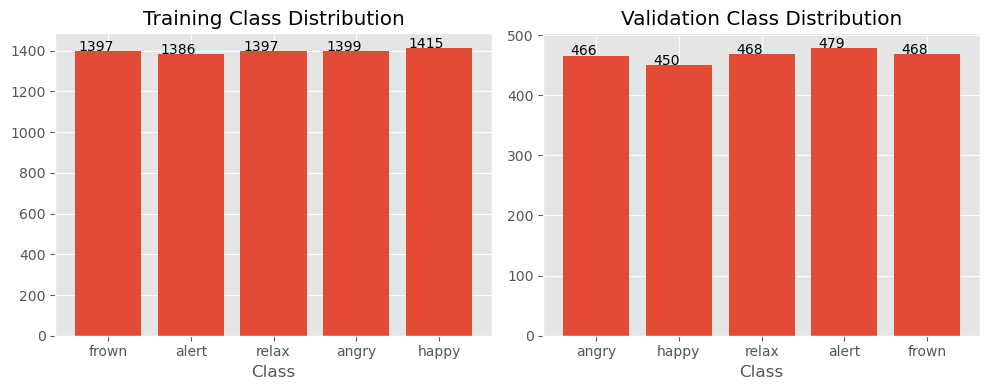

In [14]:
# Function to count class distribution
def class_distribution(dataset, class_names):
    #global class_counts
    class_counts = {}
    for _, labels_batch in dataset:
        for label in labels_batch.numpy():
            class_name = class_names[label.argmax()]  # Convert one-hot encoded label to class name
            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1
    return class_counts

# Function to plot the class distribution
def plot_class_distribution(dataset, class_names):
    class_counts = class_distribution(dataset, class_names)
    
    #fig, ax = plt.subplots()
    bars = plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    #plt.ylabel('Count')
    plt.title('Image Class Distribution')
    
    # Add class count as text overlay on each bar
    for bar, value in zip(bars, class_counts.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, 
                 bar.get_height() + 0.2, 
                 str(value), 
                 ha = 'center', 
                 color = 'black')
    plt.tight_layout()

# Plot the class distribution for the training dataset
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plot_class_distribution(ds_train, class_names)
plt.title('Training Class Distribution')

# Plot the validation class distribuition
plt.subplot(1, 2, 2)
plot_class_distribution(ds_val, class_names)
plt.title('Validation Class Distribution')

plt.tight_layout()
plt.show()

In [15]:
train_class_dist = class_distribution(ds_train, class_names)

weights = []
for i in train_class_dist.values():
    w = i / sum(train_class_dist.values())
    weights.append(w)
    
class_weight = dict(zip([0, 1, 2, 3, 4], weights))

#### Preview of Training Images

- Provided is a final review of the training data's label quality - a visual evaluation of $16$ random images and their assigned label. 
- Initial review of the original dataset during this step revealed how poorly the images were labeled. Additionally, I learned the original dataset contained $6,596$ entities other than dogs, or without the dog's face visible.
- I manually relabeled each image over a couple of months to improve the dataset quality for training a CNN model. While the dataset (by my assessment) is vastly improved, it is still very subjective and heavily biased toward my opinion of what an *alert*, *angry*, *frown*, *happy*, and *relax* dog looks like.

[Return to the Project Outline](#outline)

/tmp/ipykernel_3773/3674677785.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(ds_train.class_names[int(tf.where(labels[i] == 1).numpy())])


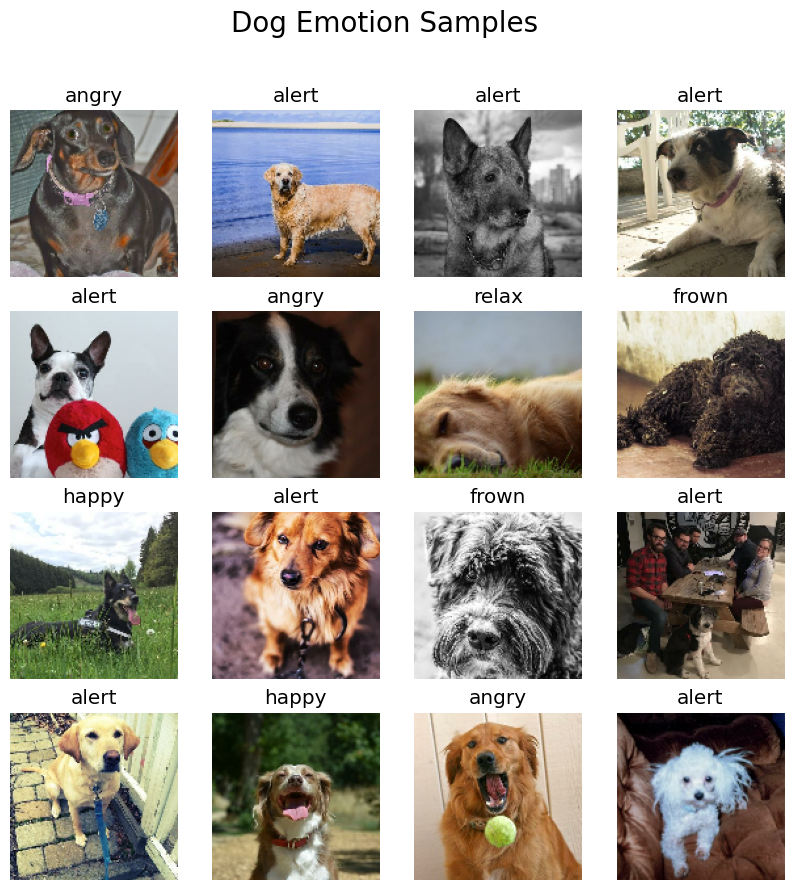

In [16]:
# Sample 16 random images for the training data set with their labels
plt.figure(figsize = (10, 10))
for images, labels in ds_train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds_train.class_names[int(tf.where(labels[i] == 1).numpy())])
    plt.suptitle('Dog Emotion Samples', fontsize = 20)
    plt.axis("off")

## CNN Transfer Learning Model Design<a id='step6'></a>

#### Baseline CNN Model<a id='step6.a'></a>

I built a baseline CNN model inspired by the Visual Geometry Group's $16$-layer VGGNet "D" model ([Krohn, 2020, p.178](#ref8); [Simonyan, 2015](#ref9)). The original `VGGNet16 D` model required an RGB image pixel size of $224$x$224$ to be passed through $13$ two-dimensional CNN layers grouped by five-channel (width) groups and two fully connected layers. Each set of channels contains a max pooling layer and a batch normalization layer.

[Return to the Project Outline](#outline)

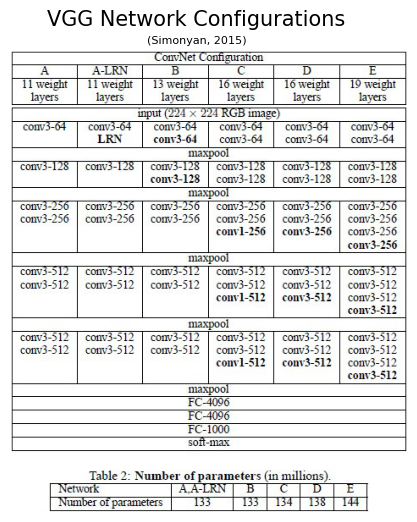

In [17]:
# Set new plot subclasses to iterate over random predictions
fig1, ax1 = plt.subplots(figsize = (10, 6)); plt.grid(False); plt.xticks([]); plt.yticks([])

plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/VGGNets_table.jpg'))

# Main title and subtitle
fig1.text(0.5, 0.92, 'VGG Network Configurations', ha = 'center', fontsize = 15)
fig1.text(0.5, 0.89, '(Simonyan, 2015)', ha = 'center', fontsize = 8)

plt.tight_layout; plt.show()

In [18]:
# Autotune dynamically to prefetch (read) data in parallel while training
AUTOTUNE = tf.data.AUTOTUNE

# Cache the data in memory for effificent training across epochs
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [19]:
baseline_CNN = Sequential([
    Input(shape = (img_size, img_size, 3)),
    
    # First CNN layer and MaxPooling layer
    Conv2D(filters = 32, kernel_size = (3, 3), activation  = 'relu',
           input_shape = (128, 128, 3)),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Second CNN Layer and MaxPooling layer
    Conv2D(filters = 64, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 64, kernel_size = (3, 3), activation  = 'relu'),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Third CNN Layer and MaxPooling layer
    Conv2D(filters = 128, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 128, kernel_size = (3, 3), activation  = 'relu'),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Third CNN Layer and MaxPooling layer
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    Conv2D(filters = 256, kernel_size = (3, 3), activation  = 'relu'),
    MaxPool2D(pool_size = (3, 3), strides = (2, 2)),
    BatchNormalization(),
    
    # Flatten layer
    Flatten(),
    
    # Two dense layers and one dense output layer
    Dense(units = 4096, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 4096, activation = 'relu'),
    Dropout(0.5),
    
    Dense(units = len(class_names), activation = 'softmax',
          dtype = 'float32')
    
])

# Summarize the model
baseline_CNN.summary(line_length = 100, show_trainable = True)

/home/dougr/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                          ┃ Output Shape                  ┃        Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ conv2d (Conv2D)                       │ (None, 126, 126, 32)          │            896 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ max_pooling2d (MaxPooling2D)          │ (None, 62, 62, 32)            │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization                   │ (None, 62, 62, 32)            │            128 │    Y    │
│ (BatchNormalization)                  │                               │                │         │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_1 (Conv2D)                     │ (None, 60, 60, 64)            │         18,496 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_2 (Conv2D)                     │ (None, 58, 58, 64)            │         36,928 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ max_pooling2d_1 (MaxPooling2D)        │ (None, 28, 28, 64)            │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization_1                 │ (None, 28, 28, 64)            │            256 │    Y    │
│ (BatchNormalization)                  │                               │                │         │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_3 (Conv2D)                     │ (None, 26, 26, 128)           │         73,856 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_4 (Conv2D)                     │ (None, 24, 24, 128)           │        147,584 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ max_pooling2d_2 (MaxPooling2D)        │ (None, 11, 11, 128)           │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization_2                 │ (None, 11, 11, 128)           │            512 │    Y    │
│ (BatchNormalization)                  │                               │                │         │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_5 (Conv2D)                     │ (None, 9, 9, 256)             │        295,168 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_6 (Conv2D)                     │ (None, 7, 7, 256)             │        590,080 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_7 (Conv2D)                     │ (None, 5, 5, 256)             │        590,080 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ conv2d_8 (Conv2D)                     │ (None, 3, 3, 256)             │        590,080 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ max_pooling2d_3 (MaxPooling2D)        │ (None, 1, 1, 256)             │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ batch_normalization_3                 │ (None, 1, 1, 256)             │          1,024 │    Y    │
│ (BatchNormalization)                  │                    

 Total params: 20,199,557 (77.06 MB)

 Trainable params: 20,198,597 (77.05 MB)

 Non-trainable params: 960 (3.75 KB)

#### Baseline Model Characteristics and Summary

My machine was not capable of training a $224$x$224$ image size without significant trade-offs (slow training time on smaller batch sizes) that resulted in poor performance ($< 20\%$ accuracy). 

Therefore, I adopted a simpler version of a `VGGNet16`-inspired model of nine $(3$x$3)$ kernel-sized CNN layers with max pooling and batch normalization, two fully connected layers of $4096$ channels with dropout, and a fully connected output layer of five channels. I did not include an early stop callback or learning rate callback to observe simple modeling behavior up to $100$ epochs (each epoch trained for approximately five seconds).

Using an RGB image pixel size of $128$x$128$ and a batch size of $128$, the baseline model achieved between $45\%$ and $50\%$ accuracy and a best categorical cross-entropy of approximately $1.4$ before significant overfitting occurred. An expected assumption is the final transfer learning model's metrics after fine-tuning will outperform the `VGGNet`-inspired baseline model.

[Return to the Project Outline](#outline)

In [20]:
#compile the model
baseline_CNN.compile(optimizer = 'adam',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy',
                                tf.keras.metrics.F1Score(average = 'macro', threshold = 0.5, name = 'f1_score')])

In [21]:
# Start the model runtime
start_time = datetime.datetime.now()

# Train the CNN model up to 100 max epochs and an early stop callback
baseline_CNN_fit = baseline_CNN.fit(ds_train,
                                    class_weight = class_weight,
                                    epochs = 100,
                                    verbose = 0,
                                    validation_data = ds_val,
                                    #callbacks = [call_LR, call_stop]
                                   )

# Stop the model runtime
stop_time = datetime.datetime.now()


2025-03-04 21:13:59.527752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a while): 38 of 1000
2025-03-04 21:14:03.241462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-03-04 21:14:03.241880: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25168896 bytes after encountering the first element of size 25168896 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
I0000 00:00:1741140843.259038    3851 service.cc:148] XLA service 0x7fa3f4003890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741140843.259127    3851 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-03-04 21:14:03.750136: I tensorflow/compiler/mlir/tensorflow/utils/dump_mli

In [22]:
# Print the Baseline model runtime and metrics
bl_time = stop_time - start_time
print ('Baseline model performance:\n\nTraining time: ', bl_time, 
       '\nAccuracy =  ', round(max(baseline_CNN_fit.history['val_accuracy']), 5),
       '\nLoss = ', round(min(baseline_CNN_fit.history['val_loss']), 5),
       sep = '')

Baseline model performance:

Training time: 0:08:00.226024
Accuracy =  0.4955
Loss = 1.29615


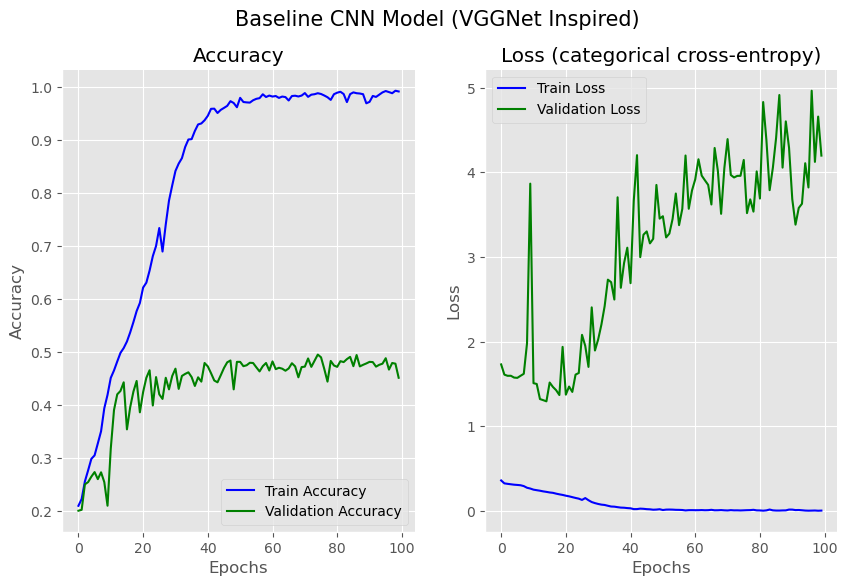

In [23]:
# Collect training and validation metric data from the model training
b_acc        = baseline_CNN_fit.history['accuracy']    
b_val_acc    = baseline_CNN_fit.history['val_accuracy']
b_loss       = baseline_CNN_fit.history['loss']
b_val_loss   = baseline_CNN_fit.history['val_loss']
b_f1         = baseline_CNN_fit.history['f1_score']
b_val_f1     = baseline_CNN_fit.history['val_f1_score']
b_num_epochs = range(len(b_acc))

# Plot the Training and Test accuracy over all the epochs
b_fig, b_ax = plt.subplots(1, 2, figsize = (10, 6))
b_fig.suptitle('Baseline CNN Model (VGGNet Inspired)', c = 'k', fontsize = '15')

b_ax[0].plot(b_acc, 'b-', label = 'Train Accuracy')
b_ax[0].plot(b_val_acc, 'g-', label = 'Validation Accuracy')
b_ax[0].set_title('Accuracy')
b_ax[0].legend()
b_ax[0].set_xlabel('Epochs')
b_ax[0].set_ylabel('Accuracy')
b_ax[0].spines['right'].set_visible(False)
b_ax[0].spines['top'].set_visible(False)

b_ax[1].plot(b_loss, 'b-', label = 'Train Loss')
b_ax[1].plot(b_val_loss, 'g-', label = 'Validation Loss')
b_ax[1].set_title('Loss (categorical cross-entropy)')     
b_ax[1].legend()
b_ax[1].set_xlabel('Epochs')                                            
b_ax[1].set_ylabel('Loss')
b_ax[1].spines['right'].set_visible(False)
b_ax[1].spines['top'].set_visible(False)

#b_ax[2].plot(b_f1, 'b-', label = 'Train F1 Score')
#b_ax[2].plot(b_val_f1, 'g-', label = 'Validation F1 Score')
#b_ax[2].set_title('F1 Score')     
#b_ax[2].legend()
#b_ax[2].set_xlabel('Epochs')                                            
#b_ax[2].set_ylabel('F1 Score')
#b_ax[2].spines['right'].set_visible(False)
#b_ax[2].spines['top'].set_visible(False)

plt.show()
b_fig.savefig('Baseline_Model_plot.jpg')

#### CNN Model Parameters<a id='step6.b'></a>

The modeling process was iterative and thorough to identify the optimal combination of image batch sizes, the top layer's fully connected channel structure, dropout rates, and fine-tuning layer structure. I followed the below process to find the best fully connected top layer, resulting in over $220$ models. Model selection was based on a composite (normalized) scoring of validation accuracy, loss, and $F1$ score.

Transfer Learning (fine-tuning in inference mode) Training Methodology:
1. Train 103 iterations of specified dense layers and channels ($32-4096$) on a set image batch size of 16 and pixel size 128x128x3.
2. Train 40 iterations on the prior top 10 models on unique batch sizes (16, 32, 64, 128).
3. Train 40 iterations on the prior top 10 models using four unique dropout ratios (0.2, 0.4, 0.6, 0.8).

Transfer Learning with Fine-Tuning Training Methodology:
1.	Train 32 iterations on the prior (transfer learning) top four models on eight unique Efficientnet2VS CNN layers (from least to most layers – 6h, 6a, 5a, 4a, 3a, 2a, 1a, all).
2.	Train 12 iterations on the prior top three models on four ranges of dropouts (0.0-0.4, 0.2-0.6, 0.4-0.8, 0.0-0.8).
3.	Select re-train the final model for additional analysis.

The final model selection - fully connected top layer structure:
- $1^{st}$ fully connected layer 
    - $256$ channels with `Leaky ReLU` activation
    - $0.4$ dropout layer
- $2^{nd}$ fully connected layer 
    - $512$ channels with `Leaky ReLU` activation
    - $0.6$ dropout layer
- $3^{rd}$ fully connected layer 
    - $1024$ channels with `Leaky ReLU` activation
    - $0.8$ dropout layer
- $4^{th}$ fully connected output layer
    - $5$ channels with a `softmax` activation

</break>

#### The Final Model:

- An image batch size $128$ provided a good balance of model training convergence and performance improvement, balanced with available computer resources ([Krohn, 2020, p.119](#ref8)).
- A maximum of $500$ epochs was arbitrarily selected as the epoch limit for model training.
- Convolutional Parameters and Metrics:
    - A kernel size of three is a common and well-established parameter for learning patterns within the image in $3$x$3$ pixel windows ([Krohn, 2020, p.168](#ref8)).
    - A pool size of $2$x$2$ was initially used to reduce the dimensions of the CNN layer input to hidden layers by a factor of two, minimizing the number of parameters required in computation ([Krohn, 2020, p.169](#ref8)).
    - The Leaky Rectified Linear Unit (`Leaky ReLU`) activation function was adopted for the final model. This function is an adjustment of the regular `ReLU`function by returning a small negative value for a negative input instead of a zero. This approach helped neurons in each hidden layer extract unique features from training images by preventing the zero-gradient normally observed in `ReLU` ([Krohn, 2020, p.94](#ref8)).
        - $Leaky \ ReLU \ (x) = \begin{cases} 0.2x & x < 0 \\ x & x \ge 0\end{cases}$
    
    - The loss (cost) function of categorical cross-entropy evaluated the dissimilarity between the predicted distribution and actual probability distribution of the classes. High probabilities for the correct class and low probabilities for the incorrect class are rewarded ([Krohn, 2020, p.113](#ref8)).
        - $Loss = -\sum_{i} y_{\text{true}, i} \log(y_{\text{pred}, i})$
    
    - Optimization algorithm of adaptive moment estimation (`Adam`) provided adaptive learning rates that helped speed up convergence using the concept of momentum, bias correction, and improved memory use by not storing the full gradient record, but instead referencing the decaying average of prior gradients ([Krohn, 2020, p.147](#ref8)).
        - I found reducing the learning rate by a tenth provided improved fine-tuning performance.
    
    - The metric of accuracy was used for interpretability and comparison against other models. While the loss metric was the most valued during training, and accuracy is universally best understood, I also looked at the F1 Score as the harmonic mean of precision (the portion of true positives out all positives) and recall (the portion of true positives out actual positives) as another metric to mitigate for class imbalance.
  
- Overfitting Controls and Gradient Stabilization
    - Image Augmentation was added at the beginning of the model to augment the training dataset size and for regularization ([Krohn, 2020, p.145](#ref8)).
    - Dropout layers were added to the fully connected layer of $0.2$, $0.6$, and $0.8$ ([Krohn, 2020, p.142](#ref8)).
    - Batch Normalization was added after the top max pooling layer for regularization following `EfficientNet 2VS` training ([Krohn, 2020, p.138](#ref8)).

- Output Parameter
    - Output Activation layer of `Softmax` was implemented for the multi-classification model. The output is a vector that sums to $1$. Each element's output lies between $0$ and $1$, indicating the probability distribution of the image's most likely label classification ([Krohn, 2020, p.106](#ref8)).

[Return to the Project Outline](#outline)

In [24]:
# Layer paramters
kernel_size = 3
layer_act   = tf.keras.layers.LeakyReLU(alpha = 0.2, name = 'leaky_relu')
out_act     = 'softmax'
pool_size   = 2
stride_size   = 2
FC_drop_1   = 0.4
FC_drop_2   = 0.8

# Modeling parameters
LR_param    = 0.001 
opt_tl      = tf.keras.optimizers.Adam(learning_rate = 0.001, name = 'adam_tl')
opt_ft      = tf.keras.optimizers.Adam(learning_rate = 0.00001, name = 'adam_ft')
loss_func   = tf.keras.losses.CategoricalCrossentropy(name = 'categorical_cross-entropy')

metric      = ['accuracy',
               tf.keras.metrics.F1Score(average = 'macro', threshold = 0.5, name = 'f1_score')]
epochs      = 500
#work_param  = multiprocessing.cpu_count()

/home/dougr/miniconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


#### CNN Callback Features<a id='step6.c'></a>

- The reduced learning rate callback provided improved model performance by reducing the learning rate by a defined factor following a defined number of epochs with no categorical cross-entropy (loss) reduction, known as "patience" ([Chollet, 2021, p.188](#ref2)).
    - I applied unique learning rate callbacks for both the transfer learning model and the fine-tuning model, to enable fine-tuning by more sensitive learning rate adjustments (the learning rate reduction factor was lowered from $0.5$ to $0.2$. The patience limit for fine-tuning was raised.
- The "model checkpoint" saved the best model weights for future use ([Chollet, 2021, p.188)](#ref2)).
- The "early stop monitor" prevented the model from needlessly training to the $500^{th}$ epoch once no performance gain (categorical cross-entropy) was observed after six epochs (i.e. the categorical cross-entropy metric plateaus or begins to degrade) ([Chollet, 2021, p.188](#ref2)).

[Return to the Project Outline](#outline)

In [26]:
# Callback to reduce the RMSProp optimizing learning rate when the loss metric stops improving
call_LR = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 2,
                            verbose  = 1, 
                            factor   = 0.5,
                            min_lr   = 0.001)

call_LR_FT = ReduceLROnPlateau(monitor = 'val_loss',
                            patience = 3,
                            verbose  = 1, 
                            factor   = 0.2,
                            min_lr   = 0.00001)

# Callback to save the best metrics (validation accuracy)
call_save = ModelCheckpoint('C:/Users/dougr/Rogi_Emotions_CNN/best_model.keras',
                            monitor        = 'val_accuracy',
                            mode           = 'max',
                            verbose        = 1,
                            save_best_only = True)

# Callback to stop training after 6 epochs of validation loss (categorical cross-entropy) degredation
call_stop = EarlyStopping(monitor  = 'val_loss', 
                          mode     = 'min', 
                          verbose  = 1,
                          patience = 8)

#### CNN Transfer Learning Model Set-up<a id='step6.d'></a>

- The `TensorFlow AUTOTUNE` function was applied to the training and validation sets, enabling `TensorFlow` to efficiently utilize system resources, such as the CPU and GPU, by prefetching and caching data in memory, resulting in optimal model runtime and faster training times ([Better Performance with the TensorFlow.data API](https://www.tensorflow.org/guide/data_performance#overview)).

</break>

- `EfficientNetV2S` Layer was instantiated for transfer learning ([TensorFlow EfficientNetV2S API](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S), [Chollet, 2021, p.227-231](#ref2)):
    - `include_top` was set to `False`. This project's model has a specified five-class output requirement.
    - `weight` was set to include the pre-trained `ImageNet` weights to train on the five-class dog emotions dataset.
    - `input shape` parameter was required since `include_top` was set to `False`.
    - `include_preprocessing` parameter was defaulted to `True` to leverage the `EfficientNetV2S` normalization and consistency between the pre-trained model and the five-class dog emotion dataset.
    - `trainable` set to False "froze" the `EfficientNetV2S` weights so that during transfer learning, the model ran inference mode only - learning by using the pre-trained weights of `EfficientNetV2S` ([Chollet, 2024](#ref3)).
    
</break>

- The transfer learning CNN model consists of the following layers:
    - Input Layer of $128$ x $128$ x $3$
    - Image Augmentation Layer to make the training data more robust and generalizable to mitigate overfitting ([Chollet, 2021, p.221](#ref2)):
        - *Random Flipping*
        - *Random Rotation* of images by a factor of $0.25$
        - *Random Translation* of the images by a factor of $0.1$ vertically and horizontally
        - *Random Contrast* of images by a factor of $0.25$
    - The top pooling layer was tested to help the model's training efficiency by reducing the number of parameters and dimension size of the EfficientNetV2S output for computational efficiency. 
        - Average pooling extracts the average features of each input patch and is less sensitive to noise or large variance ([TensorFlow API AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)). 
        - Max pooling extracts the most prominent feature of each grouping of pixels emphasizing the most important features while discarding more subtle information ([TensorFlow API MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)).
        - Max pooling showed a slight improvement over Average Pooling on the base model without any dense top layers or fine-tuning.
    - The flatten Layer was necessary to collapse the high dimensional arrays to a single dimension prior to the custom top dense layer and output layer, both of which require a one-dimension array ([Chollet, 2021, p. 229](#ref2), [Krohn, 2020, p.171, 173](#ref8)).
    - The top dense or fully connected layer is a fully connected one-dimensional set of layers to receive the multi-dimensional arrays from the `EfficentNetV2S` transfer learning model for recombination into an interpretable structure for class probability distribution. This set of fully connected layers applied the `Leaky ReLU` activation layer to continue the learning process with new fully connected layer weights ([Krohn, 2020, p.173](#ref8)).
        - I began with a single $16$-channel dense layer (no drop-out) and iteratively added additional layers with varying combinations of parameters, as described in the [CNN Model Parameters](step6.b) section.
    - The output dense layer received the top dense layer neurons and applied the `Softmax` algorithm for multi-classification probability distribution (i.e., $[0.2$, $0.6$, $0.03$, $0.1$, $0.07]$).

[Return to the Project Outline](#outline)

[Go to the Project Summary and Metrics History Review](#step10)

In [27]:
# Autotune dynamically to prefetch (read) data in parallel while training
AUTOTUNE = tf.data.AUTOTUNE

# Cache the data in memory for effificent training across epochs
ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size = AUTOTUNE)

In [28]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),
                          )
# Freeze the base_model
tl_model.trainable = False

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [29]:
# EfficientNet V2-S transfer leanring
tl_model = EfficientNetV2S(include_top = False,
                           weights = 'imagenet',
                           input_shape = (img_size, img_size, 3),)

# Freeze the base_model
tl_model.trainable = False

# Image Augmentation Layer
img_aug_layer = Sequential([
    RandomFlip('horizontal_and_vertical'),
    RandomRotation(factor = 0.25),
    RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    RandomContrast(factor = 0.25),],
    name = 'Image_Augmentation')

# Top Conv2D Layer
top_CNN_Layer = Sequential([
    Conv2D(filters = 16, 
           kernel_size = kernel_size, 
           activation = layer_act,)],
    name = 'Top_CNN_Layer')

# Top layer Pooling addition - MaxPool2D|AveragePooling2D. 
# MaxPool2D did a bit better on baseline TL model with no top dense layers
top_pooling_layer = Sequential([
    MaxPool2D(pool_size = pool_size, strides = stride_size, padding = 'valid'),
    BatchNormalization(),],
    name = 'Top_Pooling_Layer')

flatten_layer = Sequential([
    Flatten(),],
    name = 'Flatten_Layer')

# Top fully connected dense layer (start node at the bottom, end node at the top)
top_FC_layer = Sequential([
      
    Dense(units = 256, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop_2),
    Dense(units = 512, activation = layer_act),
    BatchNormalization(),
    Dropout(.6),
    Dense(units = 1024, activation = layer_act),
    BatchNormalization(),
    Dropout(FC_drop_1),
],
    name = 'Top_Dense_Layers')

# Combined model with a specified name
model1 = Sequential(name = 'Transfer_Learning_Image_Classification')

# Add layers to the model
model1.add(Input((img_size, img_size, 3)))
model1.add(img_aug_layer)
model1.add(tl_model)
#model1.add(top_CNN_Layer)
#model1.add(top_pooling_layer)
model1.add(flatten_layer)
model1.add(top_FC_layer)
model1.add(Dense(units = len(class_names),
                 activation = out_act,
                 dtype = 'float32',
                 name = 'Multi-Class_Output'))

# Summarize the model
model1.summary(line_length = 100, show_trainable = True)

Model: "Transfer_Learning_Image_Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                          ┃ Output Shape                  ┃        Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Image_Augmentation (Sequential)       │ (None, 128, 128, 3)           │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ efficientnetv2-s (Functional)         │ (None, 4, 4, 1280)            │     20,331,360 │    N    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ Flatten_Layer (Sequential)            │ (None, 20480)                 │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ Top_Dense_Layers (Sequential)         │ (None, 1024)                  │      5,907,200 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ Multi-Class_Output (Dense)            │ (None, 5)                     │          5,125 │    Y    │
└───────────────────────────────────────┴───────────────────────────────┴────────────────┴─────────┘

 Total params: 26,243,685 (100.11 MB)

 Trainable params: 5,908,741 (22.54 MB)

 Non-trainable params: 20,334,944 (77.57 MB)

#### Train the CNN Transfer Learning Model<a id='step6.e'></a>

- Compile the Model
    - **Optimizer** - The adaptive moment estimate (`Adam`) algorithm was used due to its effective and efficient extension of the root mean squared propagation (`RMSProp`) algorithm, as previously discussed in the [CNN Model Parameter](#step6.a) section.
    - **Loss** (or cost) - `categorical cross-entropy` was selected, as discussed in the [CNN Model Parameter](#step6.a) section. The `callback` feature for learning rate reduction and early stopping references the loss metric.
    - **Metrics** - `accuracy` and `F1 Score` as selected as discussed in the [CNN Model Parameter](#step6.a) section.
    
</break>

- Fit the Model
    - **Class Weights** - A defined vector based on the class (labels) distribution) was applied, as discussed in the [Review the Class Distribution](#step5.1) section.
    - **Epochs** - A max of $500$ was set, however, with the callback feature this limit was never actually reached.
    - **Verbose** - During the iterative model training, $1$ was set to review model performance in real-time. $0$ was set for the final model.
    - **Validation** - The validation dataset was used for model validation and evaluation ($25\%$ of the full dataset).
    - **Callback** - Two callbacks were set for learning rate reduction at the rate of .001 for the optimizer algorithm (`Adam`), and early stopping based on the degradation of the loss metric at a patience level of six `epochs`. Further discussed in the [CNN Model Callback](#step6.b) section.
    - **Model Runtime** - This was recorded as part of the model performance evaluation against the time required to train the model.

[Return to the Project Outline](#outline)

In [30]:
# Compile the model minimzing categorical cross-entropy with Adam optimization, while monitoring accuracy and F1 Score
model1.compile(
    optimizer = opt_tl,
    loss = loss_func,
    metrics = metric)

In [31]:
# Start the model runtime
tl_start_time = datetime.datetime.now()

# Train the CNN model up to 500 max epochs and an early stop callback
fit_history1 = model1.fit(ds_train,
                          class_weight = class_weight,
                          epochs = epochs,
                          verbose = 0,
                          validation_data = ds_val,
                          callbacks = [call_LR, call_stop])
# Stop the model runtime
tl_stop_time = datetime.datetime.now()

Epoch 52: early stopping


In [33]:
# Print the transfer Learning model runtime and metrics
tl_time = tl_stop_time - tl_start_time
print ('Transfer learning model:\n\nTraining time: ', bl_time, 
       '\nAccuracy =  ', round(max(fit_history1.history['val_accuracy']), 5),
       '\nLoss = ', round(min(fit_history1.history['val_loss']), 5),
       sep = '')

Transfer learning model:

Training time: 0:08:00.226024
Accuracy =  0.52767
Loss = 1.13088


#### CNN Transfer Learning Model Performance Analysis<a id='step6.f'></a>

The initial transfer learning model training on an image batch size of $16$ (no fully connected top layers, batch normalization, or dropout) resulted in a validation accuracy of approximately $45\%$ and a minimum categorical cross-entropy of $1.2$, similar to the `VGGNet16`-inspired baseline model. 

As discussed throughout the CNN Transfer Learning Model Design section, I applied iterative testing and focused on the transfer learning model (fine-tuning was muted with all CNN layers frozen in inference mode). Transfer learning model training continued with incremental complexity added (fully connected top layers, pooling layer, and iterative control for variance (increase in batch size, batch normalization, dropout. As model complexity increased with variance 

Once performance gains were no longer noted (based on the best combination of fully connected layers, channels, pooling, dropout, and batch normalization) is when I proceeded to the focus iterative model training based on fine-tuning performance gains. I noted this transition naturally occurred when the transfer learning model exceeded the baseline model performance, achieving approximately $50\%$ accuracy.

[Return to the Project Outline](#outline)

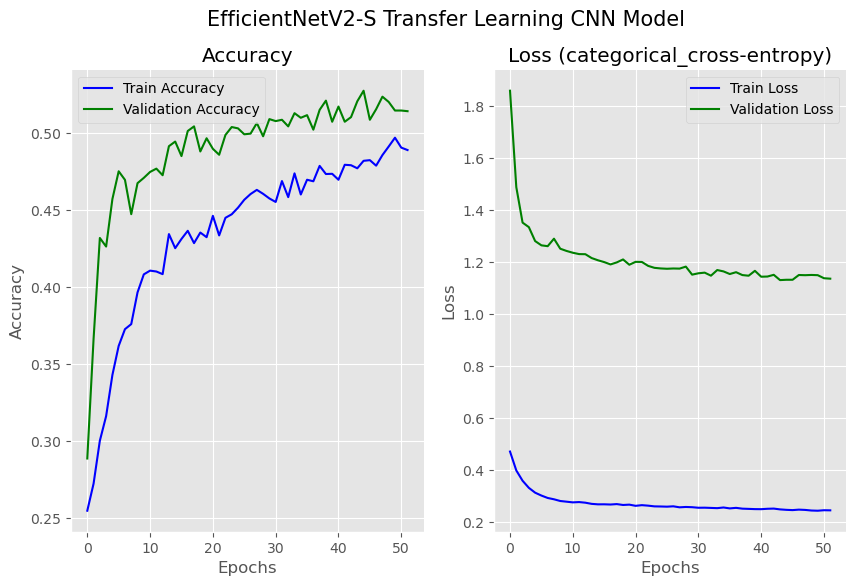

In [34]:
# Collect training and validation metric data from the model training
acc        = fit_history1.history['accuracy']    
val_acc    = fit_history1.history['val_accuracy']
loss       = fit_history1.history['loss']
val_loss   = fit_history1.history['val_loss']
f1         = fit_history1.history['f1_score']
val_f1     = fit_history1.history['val_f1_score']
num_epochs = range(len(acc))

# Plot the Training and Test accuracy over all the epochs
fig1, ax1 = plt.subplots(1, 2, figsize = (10, 6))
fig1.suptitle('EfficientNetV2-S Transfer Learning CNN Model', c = 'k', fontsize = '15')

ax1[0].plot(acc, 'b-', label = 'Train Accuracy')
ax1[0].plot(val_acc, 'g-', label = 'Validation Accuracy')
ax1[0].set_title('Accuracy')
ax1[0].legend()
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Accuracy')
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)

ax1[1].plot(loss, 'b-', label = 'Train Loss')
ax1[1].plot(val_loss, 'g-', label = 'Validation Loss')
ax1[1].set_title('Loss (' + loss_func.name + ')')     
ax1[1].legend()
ax1[1].set_xlabel('Epochs')                                            
ax1[1].set_ylabel('Loss')
ax1[1].spines['right'].set_visible(False)
ax1[1].spines['top'].set_visible(False)

#ax1[2].plot(f1, 'b-', label = 'Train F1 Score')
#ax1[2].plot(val_f1, 'g-', label = 'Validation F1 Score')
#ax1[2].set_title('F1 Score')     
#ax1[2].legend()
#ax1[2].set_xlabel('Epochs')                                            
#ax1[2].set_ylabel('F1 Score')
#ax1[2].spines['right'].set_visible(False)
#ax1[2].spines['top'].set_visible(False)

plt.show()
fig1.savefig('Model_plot_tl.jpg')

In [35]:
# Show Model validation metric output
tl_val_loss, tl_val_acc, tl_val_f1 = model1.evaluate(ds_val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.4964 - f1_score: 0.3470 - loss: 1.1626


## CNN Fine-Tuning Model Design<a id='step7'></a>

Initially, the fine-tuning stage was done in inference mode (the EfficientNetV2S weights were left untouched), while I evaluated the transfer learning model performance. Once transfer learning gains plateaued, the model evaluation transitioned to the fine-tuning model test phase. 

While evaluating the fine-tuning model performance, the priority was to determine if there was an optimal number of `EfficientNetV2S` layers to unfreeze for training (change the model's hidden layer weights), without impacting the `EfficentNetV2` batch normalization layer's statistics ([Chollet, 2024)](#ref3)).

[Return to the Project Outline](#outline)

#### CNN Fine-Tuning Model Set-up<a id='step7.a'></a>

- The decision to fine-tune in inference mode, or to unfreeze the `EfficientNetV2S` weights was decided once the transfer learning model performance plateaued (~$50\%$ accuracy and ~$1.0$ loss).
- Of note, the `EfficientNetV2S` batch normalization layers remained in inference mode for modeling stability throughout the entire project ([Chollet, 2024](#ref3)).

[Return to the Project Outline](#outline)

In [36]:
# Un-freeze the top layers of the model
#tl_model.trainable = True
print('Number of layers in the base model: ', len(tl_model.layers))
print('Number of layers in the final model: ', len(model1.layers))

Number of layers in the base model:  513
Number of layers in the final model:  5


In [37]:
# Pick a layer to begin unfrozen training
#tl_model.summary(line_length = 100, show_trainable = True)

In [38]:
# Set-up the fine-tuning for interfence, or to train on the ImageNet weights on layers - "yes", "no", "partial"
ft_inference = 'no'
layer = 'block2a_expand_conv'

if ft_inference == 'yes':
    fine_tune_layer = None
    tl_model.trainable = False

elif ft_inference == 'no':
    fine_tune_layer = 'Full' 
    tl_model.trainable = True
    
    # Set batch normalization layers to inference mode
    for layer in tl_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
            layer.momentum = 0.99

elif ft_inference == 'partial':
    fine_tune_layer = tl_model.layers.index(tl_model.get_layer(layer))
    
    #Freeze all the layers before the 'fine_tune_layer' layer
    for layer in tl_model.layers[ : fine_tune_layer]:
        layer.trainable = False
        # Set batch normalization layers to inference mode
    
    for layer in tl_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False
            layer.momentum = 0.99

In [39]:
#tl_model.summary(line_length = 100, show_trainable = True)

In [40]:
model1.summary(line_length = 100, show_trainable = True)

Model: "Transfer_Learning_Image_Classification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                          ┃ Output Shape                  ┃        Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Image_Augmentation (Sequential)       │ (None, 128, 128, 3)           │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ efficientnetv2-s (Functional)         │ (None, 4, 4, 1280)            │     20,331,360 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ Flatten_Layer (Sequential)            │ (None, 20480)                 │              0 │    -    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ Top_Dense_Layers (Sequential)         │ (None, 1024)                  │      5,907,200 │    Y    │
├───────────────────────────────────────┼───────────────────────────────┼────────────────┼─────────┤
│ Multi-Class_Output (Dense)            │ (None, 5)                     │          5,125 │    Y    │
└───────────────────────────────────────┴───────────────────────────────┴────────────────┴─────────┘

 Total params: 38,061,173 (145.19 MB)

 Trainable params: 25,932,357 (98.92 MB)

 Non-trainable params: 311,328 (1.19 MB)

 Optimizer params: 11,817,488 (45.08 MB)

#### Train and Fine-Tune the CNN Transfer Learning Model<a id='step7.b'></a>

- Compile the Model
    - **Optimizer** - Adaptive moment estimate (`Adam`) remained the algorithm of choice due to its effective and efficient extension of the root mean squared propagation (`RMSProp`) algorithm, as previously discussed in the [CNN Model Parameter](#step6.a) section, and in the [Train the CNN Transfer Learning Model](#step6.d) section. The only difference is the learning rate was reduced from $0.001$ to $0.00001$ for small incremental pretrained weight updates since fine-tuning training on a much larger model risks overfitting ([Chollet, 2024](#ref3)).
    - **Loss** - `categorical cross-entropy` remained as the function of choice, as discussed [CNN Model Parameter](#step6.a) section and [Train the CNN Transfer Learning Model](#step6.d) section. The `callback` feature for learning rate reduction and early stopping referenced the loss metric.
    - **Metrics** - Accuracy and F1 Score remained, as discussed in the [CNN Model Parameter](#step6.a) section.
    
</break>

- Fit the Model
    - **Epochs** - A max of $500$ epochs remained, however, with the early stopping callback feature in place this limit was never actually reached during fine-tuning.
    - **Initial Epoch** - This was specifically identified to begin fine-tuning at the next epoch following the epoch the transfer learning model ended ($last \ epoch \ +1$).
    - **Verbose** - This was set to $1$ during model design and evaluation to review model performance in real-time. Verbose was switched to $0$ for the final model.
    - **Validation** - The validation dataset remained for model performance validation ($25\%$ of the full dataset).
    - **Callback** - The learning rate reduction callback rate was adjusted to $0.00001$ for the optimizer algorithm (`Adam`), and the early stopping “patience” level was adjusted to eight `epochs`. Further discussed in the [CNN Model Callback](#step6.b) section.
    - **Model Runtime** - Fine-tuning model training time was recorded, as part of the model performance evaluation against the time required to train the model.

[Return to the Project Outline](#outline)

In [41]:
# Compile the model
model1.compile(
    optimizer = opt_ft,
    loss = loss_func,
    metrics = metric)

# Start the model run time
second_start_time = datetime.datetime.now()

# Train the CNN model
history1_fine = model1.fit(ds_train,
                           epochs = epochs,
                           initial_epoch = fit_history1.epoch[-1],
                           verbose = 0,
                           validation_data = ds_val,
                           callbacks = [call_LR_FT, call_stop])

# Stop the model run time
second_stop_time = datetime.datetime.now()


Epoch 89: early stopping


In [42]:
# Print the Baseline model runtime and metrics
ft_time = second_stop_time - second_start_time
print ('Fine Tuning training time: ', ft_time, 
       '\n\nFine Tuning Accuracy =  ', round(max(history1_fine.history['val_accuracy']), 5),
       '\nFine Tuning Loss = ', round(min(history1_fine.history['val_loss']), 5),
       sep = '')

Fine Tuning training time: 0:29:34.738372

Fine Tuning Accuracy =  0.63063
Fine Tuning Loss = 0.8914


#### Fine-Tuned CNN Transfer Leaning Model Performance Analysis<a id='step7.c'></a>

Initial fine-tuning (all layers frozen, except for the `EfficientNetV2S` batch normalization layers) saw accuracy improve to just above $50\%$.

As previously discussed in the [Data Preparation, Model Design, and Training Plan](step1.4a), the fine-tuning training methodology centered on an iterative process of identifying the best number of `EfficientNet2VS` layers to unfreeze for fine-tuning.

`EfficientNet2VS` (small) is a highly complex model of 33 major convolutional layers and one fully connected dense layer. A key part of the `EfficientNetV2` family of models (small, medium, and large) is that it balanced image size, batch size, and regularization to achieve a high-performance balance of accuracy and training time ([Tan, 2021](#ref10)). 

When reviewing the layer architecture of the `EfficentNet2VS` model,  decided to select seven specific CNN layer groups (in order - $6h$, $6a$, $5a$, $4a$, $3a$, $2a$, and $1a$) to unfreeze from. More clearly, I began fine-tuning with the smallest number of unfrozen layers (starting at the $6a$ layer, while iteratively growing the size of unfrozen layers until I fine-tuned on the entire `EfficentNet2VS` model (except for the batch normalization layers and the top layer).

Ultimately, the best modeling gains were found when fine-tuning the entire `EfficientNet2VS`, which is generally consistent with most literature and fine-tuning methods. Training time for fine-tuning the entire model was of no significance.

The model would generally saw an improvement from ~$50\%$ to $> 60\%$ accuracy) between the best transfer learning performance and the best fine-tuned model performance. Unfortunately, I was never able to achieve greater than ~$63\%$ accuracy and $0.88$ categorical cross-entropy. I suspect my hardware limitation of modeling on a larger image pixel size ($224$ as used by the `VGGNet` models, for example) relative to an efficient image batch size ($128$) enforced performance gain ceilings on my project. The task of image recognition for dog facial emotions is highly complex, and extremely subjective (regarding the labeling process). Being able to identify certain modeling architecture limitations based on hardware constraints is insightful for future model design performance expectations.

The following plot visualizes the immediate increase in performance, capturing the significant value of fine-tuning to model performance.

[Return to the Project Outline](#outline)

In [43]:
# Collect training and validation metric data from the model training
acc_ft       = acc
acc_ft      += history1_fine.history['accuracy']
val_acc_ft   = val_acc
val_acc_ft  += history1_fine.history['val_accuracy']

loss_ft      = loss
loss_ft     += history1_fine.history['loss']
val_loss_ft  = val_loss
val_loss_ft += history1_fine.history['val_loss']

f1_ft        = f1
f1_ft       += history1_fine.history['f1_score']
val_f1_ft    = val_f1
val_f1_ft   += history1_fine.history['val_f1_score']

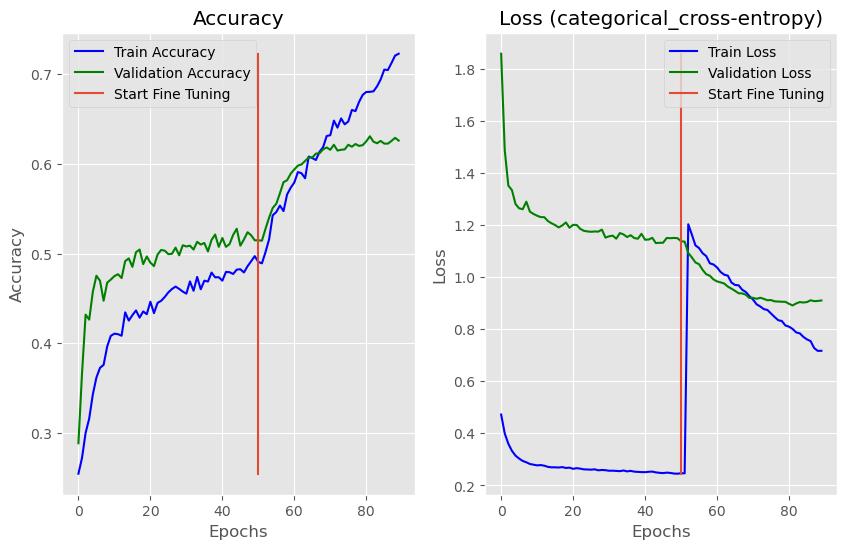

In [44]:
# Plot the Training and Test accuracy over all the epochs
fig2, ax2 = plt.subplots(1, 2, figsize = (10, 6))
#fig1.subtitle('CNN Model', c = 'k', fontsize = '15')

ax2[0].plot(acc_ft, 'b-', label = 'Train Accuracy')
ax2[0].plot(val_acc_ft, 'g-', label = 'Validation Accuracy')   
ax2[0].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(acc), min(acc_ft), min(val_acc), min(val_acc_ft)), max(max(acc), max(acc_ft), max(val_acc), max(val_acc_ft))],
            label = 'Start Fine Tuning')
ax2[0].set_title('Accuracy')
ax2[0].legend()
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Accuracy')

ax2[1].plot(loss_ft, 'b-', label = 'Train Loss')
ax2[1].plot(val_loss_ft, 'g-', label = 'Validation Loss')
ax2[1].plot([fit_history1.epoch[-1] - 1, 
             fit_history1.epoch[-1] - 1], 
            [min(min(loss), min(loss_ft), min(val_loss), min(val_loss_ft)), max(max(loss), max(loss_ft), max(val_loss), max(val_loss_ft))], 
            label = 'Start Fine Tuning')
ax2[1].set_title('Loss (' + loss_func.name + ')')
ax2[1].legend()
ax2[1].set_xlabel('Epochs')                                             
ax2[1].set_ylabel('Loss')

#ax2[2].plot(f1_ft, 'b-', label = 'Train F1 Score')
#ax2[2].plot(val_f1_ft, 'g-', label = 'Validation F1 Score')
#ax2[2].plot([fit_history1.epoch[-1] - 1, 
#             fit_history1.epoch[-1] - 1], 
#            [min(min(f1), min(f1_ft), min(val_f1), min(val_f1_ft)), max(max(f1), max(f1_ft), max(val_f1), max(val_f1_ft))], 
#            label = 'Start Fine Tuning')
#ax2[2].set_title('F1 Score')
#ax2[2].legend()
#ax2[2].set_xlabel('Epochs')                                             
#ax2[2].set_ylabel('F1 Score')

plt.show()
fig2.savefig('Model_plot_ft.jpg')

In [45]:
# Show Fine-Tuned Model output
ft_val_loss, ft_val_acc, ft_val_f1 = model1.evaluate(ds_val)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.6157 - f1_score: 0.5890 - loss: 0.9341


#### Display Predicted Emotions from the Validation Dataset<a id='step7.d'></a>

To subjectively evaluate the model performance, we visualize the predicted labeling for the validation data set. 

[Return to the Project Outline](#outline)

In [46]:
# Recall the Validation data set
ds_val = image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = True,
    seed = seed,
    validation_split = .2,
    subset = 'validation')

Found 9325 files belonging to 5 classes.
Using 1865 files for validation.


In [47]:
# Get validation predictions
val_probs = model1.predict(ds_val)

15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 525ms/step


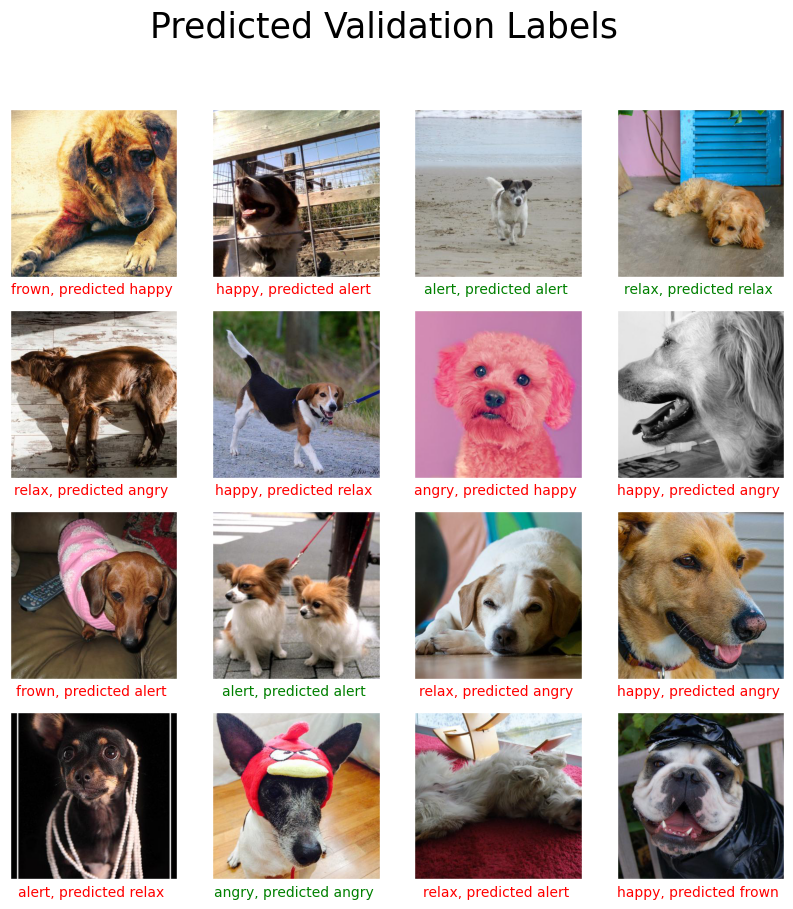

In [48]:
# Set total number of images to plot
num_pics = 16

# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_val.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig3, ax3 = plt.subplots(figsize = (10, 10))
ax3.remove()

for i in range(num_pics):
    fig3.suptitle('Predicted Validation Labels', size = 25)
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(val_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    actual = ds_val.file_paths[start_index + i][85:90]
    
    if pred != actual:
        col = 'r'
    else:
        col = 'g'
    
    plt.xlabel('{}, predicted {} '.format(actual, pred), 
               color = col, fontsize = 10)
    plt.imshow(load_img(ds_val.file_paths[start_index + i]))
    plt.savefig('val_preds.jpg')
    plt.tight_layout

## Final CNN Model Confusion Matrix<a id='step8'></a>

A key evaluation step is to review the confusion matrix. Accuracy alone is deceiving and does not well represent the performance across five classes (which is why the F1 score was included as a model metric).

Of particular interest is the F1 score for each class, as part of my secondary model evaluation objectives to monitor and maximize ($> \ 25\%$ `F1 Score` for each class).

The secondary objective was to satisfy a series of performance metrics (prioritized):
#### 1. Consistently classify the opening image of Rogi as *happy*.
- The objective **was achieved**, as seen in the history of the [model performance table](#step10).
#### 2. Achieve $>= 70\%$ validation accuracy.
- The objective was **not met**. I achieved the best accuracy of approximately $63\%$. Most models would peak between $59$-$60\%$.
#### 3. Achieve class F1 Scores of $>= 25\%$.
- The objective was **not met**. I achieved the best `F1 Score` of approximately $1.4$. Like objective #$2$, the majority of F1 Scores would peak between $19$-$23\%$.

[Return to the Project Outline](#outline)

<Figure size 1000x700 with 0 Axes>

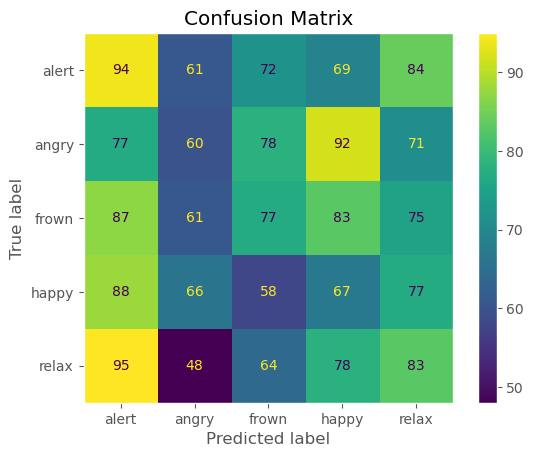

              precision    recall  f1-score   support

       alert       0.25      0.21      0.23       441
       angry       0.16      0.20      0.18       296
       frown       0.20      0.22      0.21       349
       happy       0.19      0.17      0.18       389
       relax       0.23      0.21      0.22       390

    accuracy                           0.20      1865
   macro avg       0.20      0.20      0.20      1865
weighted avg       0.21      0.20      0.21      1865



In [49]:
#build out the confusion matrix
val_preds = list(val_probs.argmax(axis = 1))

val_labels = [label[85:90] for label in ds_val.file_paths]

lab_encoder = preprocessing.LabelEncoder()
lab_encoder.fit(val_labels)
val_actual_labels = lab_encoder.transform(val_labels)

def cm_plot_metrics(actual_labels, pred_labels, label_names):
    cm = confusion_matrix(actual_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                  display_labels = label_names)
    
    plt.figure(figsize = (10, 7))
    disp.plot()
    plt.grid(False)
    plt.title('Confusion Matrix')
    plt.savefig('CM.jpg')
    plt.show()
    
    print(classification_report(pred_labels, actual_labels, 
                                target_names = label_names))

cm_plot_metrics(val_actual_labels, 
                val_preds, 
                class_names)

## Final CNN Model Evaluation on Unseen Images of Rogi<a id='step9'></a>

This step, while purely subjective, is arguably the most important. If the customer or user does not agree with the model's predicted emotion labels for Rogi, then the project in the eyes of the customer will likely be a failure. The secondary objective metrics are critical for statistical significance to validate the model's ability to effectively train on the dataset and generalize to a validation dataset (to a degree, without a separate test dataset of unseen label images).

The $201$ images of Rogi represent unseen and unlabeled images. However, the "true" or "actual" labels are ultimately determined by my wife. Dogs are highly expressive animals, and the human's perspective of what a *happy* dog looks like can be influenced by unrelated factors (i.e., a dog's mouth formed in such a way that looks like a human smile). In my opinion, the model did exceptionally well on the Rogi images - I would agree with nearly all the labels. Consequently, I was the sole individual to relabel or "clean" the entire training and validation dataset of images, and therefore it should make sense that the model's predictions are aligned with my opinion of Rogi's emotions.

Unfortunately, my wife wasn't as impressed as I was. This was insightful in that the determination of what would appear for my wife as *happy* versus *relax* or *angry* is extremely subjective and tied to memories that are associated with Rogi's pictures. The relabeling of the full training dataset is $100\%$ representative of my opinion about what an *alert*, *angry*, *frown*, *happy*, and *sad* dog looks like, and not my wife's opinion.

Nevertheless, the final and arguably the most critical takeaway is that this project necessitated the customer's involvement from the very beginning when the problem statement was developed, throughout the training data exploration, model development, and evaluation. In retrospect, this is an extremely obvious lesson that is well documented and taught at every business school, yet a very common failure point in project management, no matter the industry. Thankfully, I was the ultimate customer of this project, so this lesson is a bonus reminder to always engage your stakeholders.

[Return to the Project Outline](#outline)

#### Read in Rogi Images

In [50]:
directory_path = r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images'

# Create dataset for unseen Rogi images
ds_rogi = tf.keras.utils.image_dataset_from_directory(
    directory_path,
    labels = None,  # Labels will be inferred from subdirectory names
    class_names = None,  # Class names will be inferred
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_size, img_size),
    shuffle = False,  # No need to shuffle for unseen data
    seed = seed
)

Found 212 files.


#### Predict and Plot Rogi's Emotions

[Return to the Project Outline](#outline)

In [51]:
# Predict Rogi label probabilities
rogi_probs = model1.predict(ds_rogi)

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step


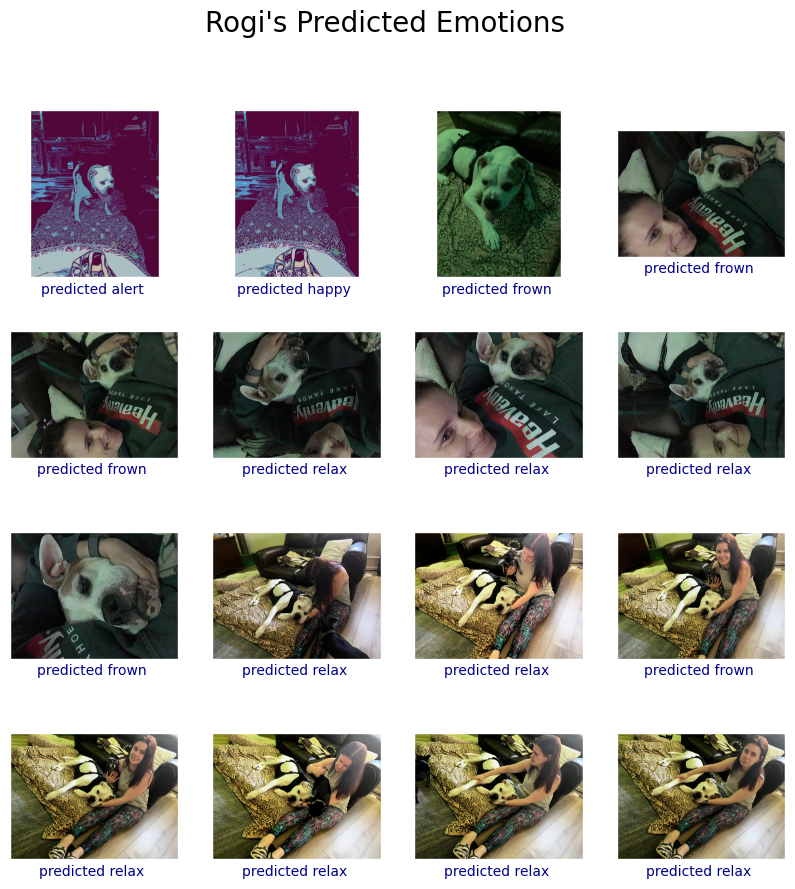

In [52]:
# Select a random starting point in data set for image prediction selection
start_index = random.randint(0, len(ds_rogi.file_paths) - num_pics)

# Set new plot subclasses to iterate over random predictions
fig4, ax4 = plt.subplots(figsize = (10, 10))
fig4.suptitle('Rogi\'s Predicted Emotions', size = 20)
ax4.remove()

for i in range(num_pics):
    
    plt.subplot(int(np.sqrt(num_pics)), int(np.sqrt(num_pics)), i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(rogi_probs[[start_index + i]])
    if pred == 0:
        pred = class_names[0] 
    elif pred == 1:
        pred = class_names[1] 
    elif pred == 2:
        pred = class_names[2]
    elif pred == 3:
        pred = class_names[3]
    else:
        pred = class_names[4]
    
    plt.xlabel('predicted {} '.format(pred), color = 'darkblue', fontsize = 10)
    plt.imshow(load_img(ds_rogi.file_paths[start_index + i]))

    plt.tight_layout

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

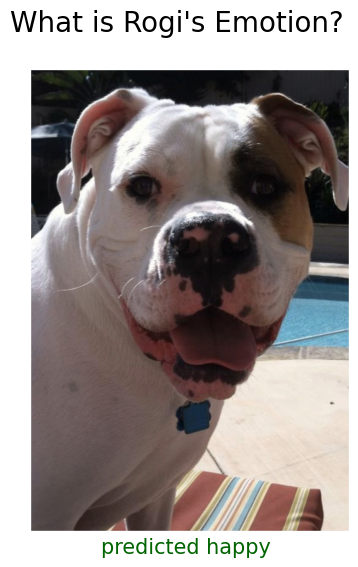

In [53]:
#Run the model on the introduction image of Rogi

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (img_size, img_size, 3))
   np_image = np.expand_dims(np_image, axis = 0)
   return np_image

intro_image_pred = model1.predict(load(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_7415.jpg'))

# Set new plot subclasses to iterate over random predictions
fig5, ax5 = plt.subplots(figsize = (10, 6))
fig5.suptitle('What is Rogi\'s Emotion?', size = 20)
ax5.remove()

plt.grid(False)
plt.xticks([])
plt.yticks([])

pred = np.argmax(intro_image_pred)
if pred == 0:
    pred = class_names[0] 
elif pred == 1:
    pred = class_names[1] 
elif pred == 2:
    pred = class_names[2]
elif pred == 3:
    pred = class_names[3]
else:
    pred = class_names[4]

if pred == 'happy':
    color = 'darkgreen'
else:
    color = 'red'
plt.xlabel('predicted {} '.format(pred), color = color, fontsize = 15)
plt.imshow(load_img(r'/mnt/c/Users/dougr/Data_Science_Projects/Python/Dog_Image_Files/Rogi_Images/IMG_7415.jpg'))
plt.savefig('happy_rogi.jpg')
plt.tight_layout

## Project Summary and Metrics History Review<a id='step10'></a>

This final summary of metrics was used to help guide modeling design. It captures the key metrics following the progression of my iterative model development and evaluation process.

Ultimately, I found that out-of-the-box, transfer learning with fine-tuning on all convolutional layers was highly effective and easily outperformed my `VGGNet`-inspired baseline model. However, after iterative training on over 220 variations of the transfer learning model with fine-tuning, I found performance peaked at approximately $63\%$ accuracy and $0.89$ categorical cross-entropy. 

I did not find a better combination of fully connected layers, channels, dropout, and batch normalization that would stop overfitting accuracy and degrade categorical cross-entropy. Adding a CNN with max pooling prior to the top fully connected layer provided no gains. Adding more dense layer depth provided no gains in performance.

In studying the `VGGNet` and `AlexNet` architectures, I regrettably could not reproduce those models on my machine with the same image pixel size $224$ x $224$ due to limited computer resources to handle the large parameter sizes. My machine could only handle a maximum image size of $128$ x $128$, which I suspect may result in information loss and limited performance.

However, despite the inability to achieve $> 75\%$ of accuracy and class F1 scores of $> 25\%$, I am satisfied with how the model performed on unseen data, specifically in classifying Rogi's emotions. Ultimately, the training data was designed around my perception of what an *alert*, *angry*, *frown*, *happy*, and *relax* dog should look like, not my wife's. 

From the project's inception, it unexpectedly and continuously grew in modeling detail and process methodology. With satisfaction, I can claim the project's primary objective for self-learning and to develop an independent understanding of deep learning applications was fully achieved.

[Return to the Project Outline](#outline)

In [54]:
# Check if the file already exists in the working directory
file_path = 'top_model_testing_df_ft_dropout.csv'

if not os.path.exists(file_path):
    # Create a new DataFrame
    top_model_testing_df_ft_dropout = pd.DataFrame(columns = [
        'ID', 'Accuracy', 'F1 Score', 'Loss', 'Composite Score', 'Rogi Happy', 
        'Training Time', 'Epochs', 'Batch Size', 'Hidden Activation', 
        'Output Activation', 'Optimizer', 'Top CNN Layer', '# Hidden Layers', 
        'Start Node', 'End Node', 'Start Dropout', 'End Dropout','Fine Tuning Layer'
    ])

    # Save the DataFrame to a CSV file
    top_model_testing_df_ft_dropout.to_csv(file_path, 
                                 index = False)
    
    print(f"DataFrame saved to {file_path}")
    
else:
    # Load the existing DataFrame
    top_model_testing_df_ft_dropout = pd.read_csv(file_path)

# Create a new row entry
ID = len(top_model_testing_df_ft_dropout.index) + 1
acc = ft_val_acc
f1 = ft_val_f1
loss = ft_val_loss

rogi_happy = pred
time = str(tl_time + ft_time)
epoch = len(history1_fine.epoch) + len(fit_history1.epoch) - 1
batch = batch_size
h_act = layer_act.name
o_act = out_act
opt = opt_ft.name
tlm = tl_model.name
top_cnn = any(isinstance(layer, Conv2D) for layer in model1.layers)

# Extracting details of the top fully connected layer
top_FC_layer = model1.get_layer('Top_Dense_Layers')
hidden_layers = [layer for layer in top_FC_layer.layers if isinstance(layer, Dense)]
hidden_layer_count = len(hidden_layers)

start_node = hidden_layers[-1].units if hidden_layers else None
end_node = hidden_layers[0].units if hidden_layers else None

drop_1 = FC_drop_1
drop_2 = FC_drop_2

ft_layer = fine_tune_layer

# Add the new data to the DataFrame
new_row = {
    'ID': ID, 
    'Accuracy': acc, 
    'F1 Score': f1, 
    'Loss': loss, 
    'Composite Score': None,  # Placeholder for now
    'Rogi Happy': rogi_happy, 
    'Training Time': time, 
    'Epochs': epoch, 
    'Batch Size': batch,
    'Hidden Activation': h_act, 
    'Output Activation': o_act, 
    'Optimizer': opt, 
    'Top CNN Layer': top_cnn, 
    '# Hidden Layers': hidden_layer_count,
    'Start Node': start_node, 
    'End Node': end_node, 
    'Start Dropout': drop_1, 
    'End Dropout': drop_2,
    'Fine Tuning Layer': ft_layer
}

top_model_testing_df_ft_dropout = pd.concat([top_model_testing_df_ft_dropout, 
                                   pd.DataFrame([new_row])], 
                                  ignore_index = True)

# Recompute Composite Score for all rows
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(top_model_testing_df_ft_dropout[['Accuracy', 'F1 Score', 'Loss']])
top_model_testing_df_ft_dropout['Composite Score'] = (normalized_values[:, 0] * (1/3)) + (normalized_values[:, 1] * (1/3)) + ((1 - normalized_values[:, 2]) * (1/3))

# Save the updated DataFrame to the same file
top_model_testing_df_ft_dropout.to_csv(file_path, index = False)
print(f"DataFrame updated and saved to {file_path}")

DataFrame updated and saved to top_model_testing_df_ft_dropout.csv


/tmp/ipykernel_3773/3562802691.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_model_testing_df_ft_dropout = pd.concat([top_model_testing_df_ft_dropout,


In [55]:
# Review the current iteration of model test:
#1. Various cominations of nodes (32-4096) of batch size 16 (103 total models);
#2. Top 10 Composite Scores (normalized) of batch size 16 models tested to batch sizes 16, 32, 64, 128 (40 total models); 
#3. Top 10 of all batch size models test with dropout 0.2, 0.4, 0.6, 0.8 (40 total models);
#4. Top 10 of all dropout models with fine-tuning at 4 different unfrozen layers (40 total models)
#5. Final model selection
top_model_testing_df_ft_dropout

ID  Accuracy  F1 Score      Loss  Composite Score Rogi Happy  \
0    1  0.631918  0.588212  0.912251         0.970811      happy   
1    2  0.618190  0.593166  0.938103         0.951771      happy   
2    3  0.622480  0.592082  0.950216         0.949108      happy   
3    4  0.615616  0.588421  0.938011         0.947254      happy   
4    5  0.612184  0.565557  0.946121         0.928532      happy   
5    6  0.603604  0.592266  0.982181         0.920861      happy   
6    7  0.605320  0.581046  0.976243         0.918607      happy   
7    8  0.603604  0.579999  0.992292         0.909682      happy   
8    9  0.547405  0.494374  1.091925         0.776290      happy   
9   10  0.547834  0.496803  1.107507         0.771105      frown   
10  11  0.630202  0.586006  0.920143         0.964832      happy   
11  12  0.617761  0.592760  0.945081         0.948159      happy   
12  13  0.617761  0.581570  0.944268         0.942369      happy   
13  14  0.632776  0.584847  0.899373         0.975269      happy   
14  15  0.618619  0.578808  0.924006         0.950401      happy   
15  16  0.621193  0.583173  0.908904         0.961383      happy   
16  17  0.625912  0.588689  0.897694         0.972913      happy   
17  18  0.635350  0.603180  0.904039         0.985241      happy   
18  19  0.638353  0.606863  0.900010         0.991310      happy   
19  20  0.632776  0.598464  0.883926         0.989533      happy   
20  21  0.633205  0.597530  0.891149         0.986173      happy   
21  22  0.627199  0.598343  0.890774         0.982231      happy   
22  23  0.217932  0.000000  1.642874         0.013008      relax   
23  24  0.200772  0.000000  1.633086         0.004299      relax   
24  25  0.610897  0.576700  0.955477         0.929568      happy   
25  26  0.624625  0.569946  0.909176         0.956600      happy   
26  27  0.624196  0.594489  0.909673         0.969537      happy   
27  28  0.609181  0.579187  0.980715         0.918548      alert   
28  29  0.600601  0.572867  0.958627         0.918274      alert   
29  30  0.635779  0.594375  0.915719         0.975600      happy   
30  31  0.625912  0.586552  0.901055         0.970264      happy   
31  32  0.630202  0.593956  0.899233         0.978383      happy   
32  33  0.625054  0.597950  0.920773         0.967213      happy   
33  34  0.627199  0.599799  0.913615         0.972999      happy   
34  35  0.623767  0.602864  0.913474         0.972143      happy   
35  36  0.607894  0.574738  0.962843         0.922978      happy   
36  37  0.631489  0.592671  0.911096         0.973442      happy   
37  38  0.640498  0.602197  0.889079         0.995174      happy   
38  39  0.625912  0.596576  0.910383         0.971672      happy   

     Training Time  Epochs  Batch Size Hidden Activation Output Activation  \
0          22:03.2      69         128        leaky_relu           softmax   
1          17:03.9      44         128        leaky_relu           softmax   
2          18:47.4      53         128        leaky_relu           softmax   
3          19:23.3      61         128        leaky_relu           softmax   
4          20:07.4      56         128        leaky_relu           softmax   
5          19:50.3      69         128        leaky_relu           softmax   
6          16:52.1      43         128        leaky_relu           softmax   
7          15:08.3      49         128        leaky_relu           softmax   
8          09:54.1      54         128        leaky_relu           softmax   
9          07:46.0      40         128        leaky_relu           softmax   
10  0:20:52.528677      62         128        leaky_relu           softmax   
11  0:18:10.506063      54         128        leaky_relu           softmax   
12  0:18:10.806247      54         128        leaky_relu           softmax   
13  0:25:43.372936      80         128        leaky_relu           softmax   
14  0:20:21.629788      64         128        leaky_relu           softmax   
15  0:18:20.741672      53         

In [56]:
# Top Ten overal models
top_ft_df_do = pd.read_csv('top_model_testing_df_ft_dropout.csv')
top_ft_df_do.sort_values(by = 'Composite Score', ascending = False).head(10).to_csv('top_10_models.csv', index = False)
top_ft_df_do.sort_values(by = 'Composite Score', ascending = False).head(10)
#######################
# 128 epochs, .2 and .4 dropout at 6h, 6a, 5a, 4a, 3a, 2a, 1a layers
# 3x256 nodes
# 5x512 nodes
# 1024-256 nodes
# 2048-1024 nodes
#######################
# 128 epochs, 0.0-0.4, 0.2-0.6, 0.4-0.8, 0.0-0.8 dropouts with all layers
# 3x256 nodes
# 5x512 nodes
# 1024-256 nodes - best model .4-.8 dropout, all layers

ID  Accuracy  F1 Score      Loss  Composite Score Rogi Happy  \
37  38  0.640498  0.602197  0.889079         0.995174      happy   
18  19  0.638353  0.606863  0.900010         0.991310      happy   
19  20  0.632776  0.598464  0.883926         0.989533      happy   
20  21  0.633205  0.597530  0.891149         0.986173      happy   
17  18  0.635350  0.603180  0.904039         0.985241      happy   
21  22  0.627199  0.598343  0.890774         0.982231      happy   
31  32  0.630202  0.593956  0.899233         0.978383      happy   
29  30  0.635779  0.594375  0.915719         0.975600      happy   
13  14  0.632776  0.584847  0.899373         0.975269      happy   
36  37  0.631489  0.592671  0.911096         0.973442      happy   

     Training Time  Epochs  Batch Size Hidden Activation Output Activation  \
37  0:24:25.771573      84         128        leaky_relu           softmax   
18  0:24:57.901511      87         128        leaky_relu           softmax   
19  0:26:17.544537      91         128        leaky_relu           softmax   
20  0:20:48.979032      65         128        leaky_relu           softmax   
17  0:27:00.892925      93         128        leaky_relu           softmax   
21  0:21:09.850014      62         128        leaky_relu           softmax   
31  0:22:58.575042      73         128        leaky_relu           softmax   
29  0:26:01.533050      94         128        leaky_relu           softmax   
13  0:25:43.372936      80         128        leaky_relu           softmax   
36  0:27:31.502327     101         128        leaky_relu           softmax   

   Optimizer  Top CNN Layer  # Hidden Layers  Start Node  End Node  \
37   adam_ft          False                3        1024       256   
18   adam_ft          False                3        1024       256   
19   adam_ft          False                3         256       256   
20   adam_ft          False                5         512       512   
17   adam_ft          False                5         512       512   
21   adam_ft          False                3        1024       256   
31   adam_ft          False                3        1024       256   
29   adam_ft          False                3        1024       256   
13   adam_ft          False                3         256       256   
36   adam_ft          False                3        1024       256   

    Start Dropout  End Dropout Fine Tuning Layer  
37            0.4          0.8              Full  
18            0.4          0.8              Full  
19            0.0          0.8              Full  
20            0.0          0.8              Full  
17            0.4          0.8              Full  
21            0.0          0.8              Full  
31            0.4          0.8              Full  
29            0.4          0.8              Full  
13            0.2          0.6              Full  
36            0.4          0.8              Full


[Return to the CNN Transfer Learning Model Set-up](#step6.c)

## References<a id='ref'></a>
1. Andrade, D. (2024). Dog Emotions - 5 Classes [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8330954.<a id='ref1'></a>
2. Chollet, F. (2021). Deep Learning with Python (2nd ed.). Manning Publications Co.<a id='ref2'></a>
3. Chollet, F. (2024, April 24). Transfer learning & fine-tuning: Tensorflow Core. TensorFlow. https://www.tensorflow.org/guide/keras/transfer_learning<a id='ref3'></a>
4. Devzohaib. (2022, October 3). Dog emotions prediction. Kaggle.https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction<a id='ref4'></a>
5. Gareth, J. Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An introduction to statistical Learning with applications in Python. Springer. <a id='ref5'></a>
6. Keras: tensorflow V2.15.0. TensorFlow. (n.d.). https://www.tensorflow.org/api_docs/python/tf/keras<a id='ref6'></a>
7. Kingma, D. P., & Ba, J. (2015). Adam: A method for stochastic optimization. International Conference on Learning Representations. https://doi.org/10.48550/arXiv.1412.6980<a id='ref7'></a>
8. Krohn, J., Beyleveld, G., & Bassens, A. (2020). Deep learning illustrated: A visual, interactive guide to artificial intelligence. Addison-Wesley.<a id='re8'></a>
9. Simonyan, K. and Zisserman, A. (2015) Very Deep Convolutional Networks for Large-Scale Image Recognition. The 3rd International Conference on Learning Representations (ICLR2015). https://doi.org/10.48550/arXiv.1409.1556<a id='ref9'></a>
10. Tan, M., & Le, Q. V. (2021). EfficientNetV2: Smaller Models and Faster Training. International Conference on Machine Learning. https://doi.org/10.48550/arXiv.2104.00298.<a id='ref10'></a>
11. TensorFlow API: EfficentNetV2S. (n.d.). https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetV2S<a id='ref11'></a>


[Return to the Project Outline](#outline)